In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../Code/')

In [3]:
from coding_V0_NR import *
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
import random

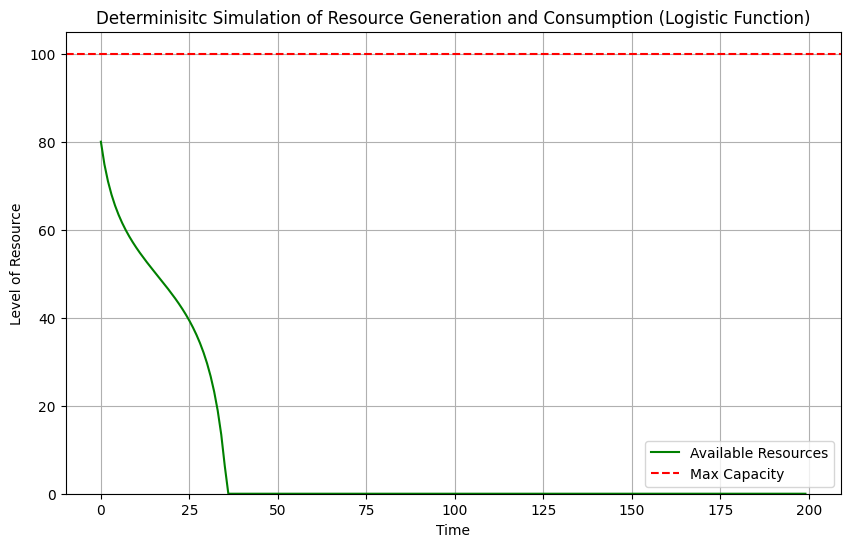

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
initial_resources = 80  # Recurso inicial
growth_rate = 0.46  # Tasa de crecimiento intrínseca del recurso (r)
consumption_rate = 12.5  # Consumo anual de recurso 
max_capacity = 100  # Capacidad máxima del recurso (K)

# Tiempo
years = 200  # Simulación por 50 años
time = np.arange(0, years)

# Inicialización de variables
resources = np.zeros(years)  # Array para almacenar la cantidad de recurso cada año
resources[0] = initial_resources

# Función logística de crecimiento
def logistic_growth(R, r, K):
    return r * R * (1 - R / K)

# Simulación del modelo
for t in range(1, years):
    # Crecimiento logístico del recurso
    growth = logistic_growth(resources[t-1], growth_rate, max_capacity)
    
    # Actualizar la cantidad de recurso disponible (después de generación y consumo)
    resources[t] = resources[t-1] + growth - consumption_rate
    
    # Evitar que la cantidad de recursos sea negativa
    if resources[t] < 0:
        resources[t] = 0

# Graficar los resultados
plt.figure(figsize=(10,6))
plt.plot(time, resources, label="Available Resources", color="green")
plt.axhline(y=max_capacity, color='r', linestyle='--', label="Max Capacity")
plt.title("Determinisitc Simulation of Resource Generation and Consumption (Logistic Function)")
plt.xlabel("Time")
plt.ylabel("Level of Resource")
plt.legend()
plt.ylim(0,105)
plt.grid(True)
plt.savefig('/Users/catalinabernal/Desktop/TragedyCommons/Tragedy_commons/Figures/resources_2.png')
plt.show()

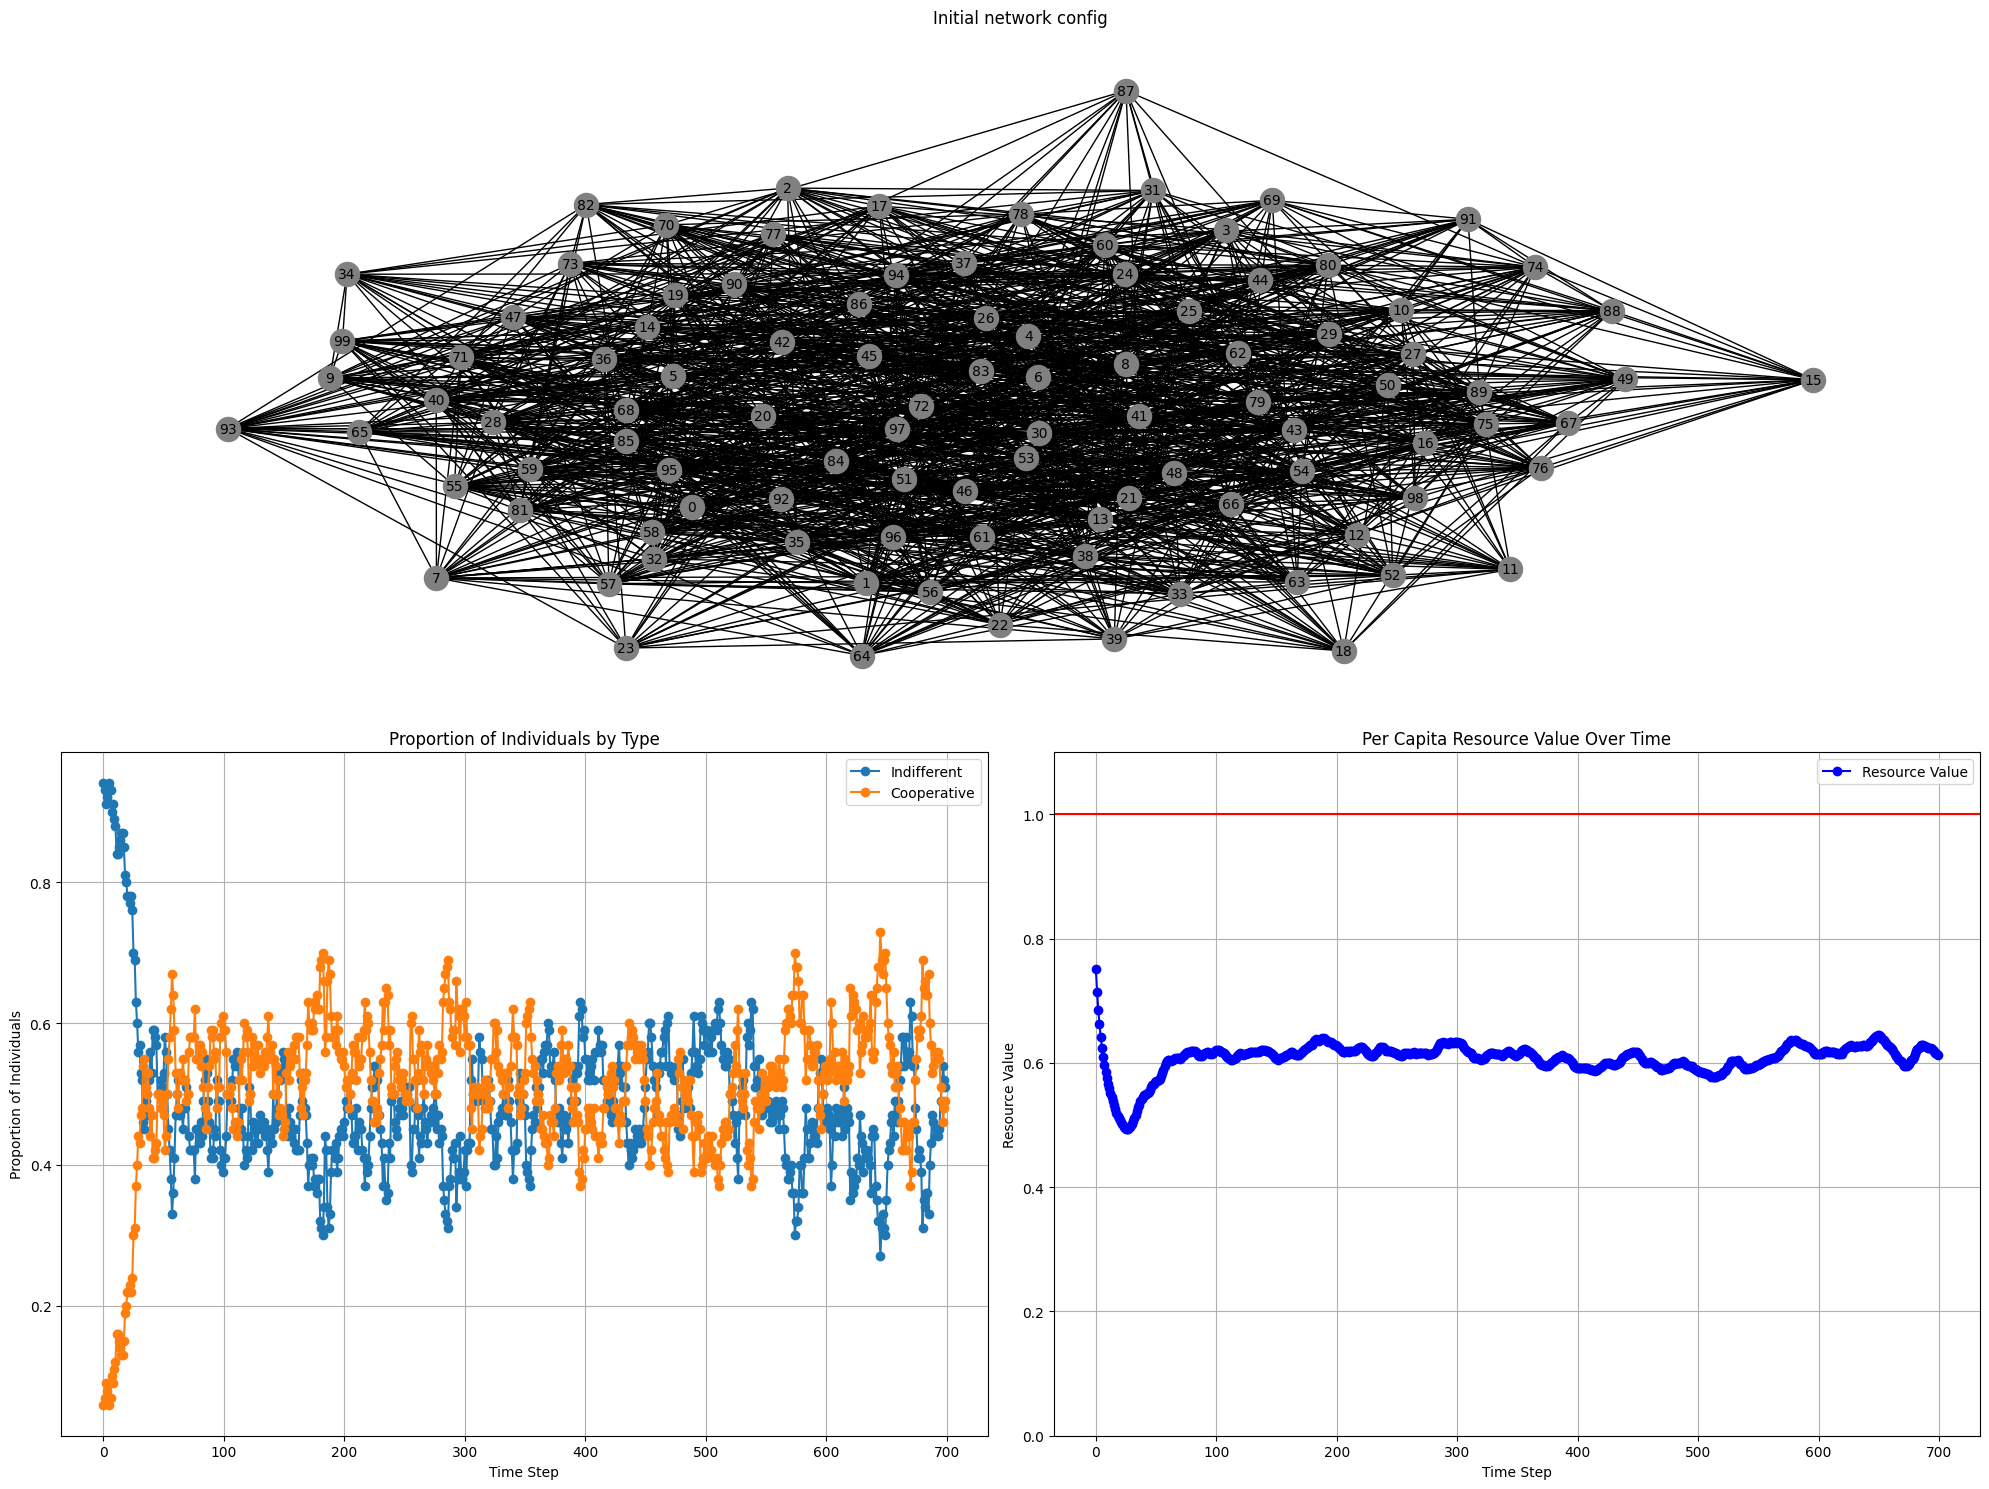

In [19]:
# Simulation Parameters
num_individuals = 100  # Number of individuals in the graph
p_cooperative = 0.05  # Initial fraction of cooperative individuals
beta = 0.008  # Probability parameter for cooperation
mu = 0.1  # Constant probability of becoming indifferent
T = 700  # Number of time steps

# Resource parameters
initial_resource = 80 / num_individuals # Initial value of the resource
max_capacity = 100 /num_individuals
replenishment_proportion = 0.46  # 46% of the remaining resource is replenished each step
consumption_rates = {'Indifferent': 0.125, 'Cooperative':0.095}  # Consumption rates for each type

# Critical resource parameters
critical_value = 0.45 # If the resource drops below this value, extra cooperation probability is triggered
rho = 0.01  # Extra cooperation probability when the critical resource threshold is crossed

# Example: Erdos-Renyi graph
graph = nx.erdos_renyi_graph(num_individuals, 0.3)

# Initialize and run the model
model = ABMModel(graph, p_cooperative, beta, mu, T, initial_resource, replenishment_proportion, consumption_rates, critical_value, rho, max_capacity)

# Run the simulation
model.run()

# Get the history of the simulation
history = model.get_history()
resource_history = model.get_resource_history()

# Convert history into time series data for plotting
timesteps = range(T)
indifferent_proportions = [h['Indifferent'] for h in history]
cooperative_proportions = [h['Cooperative'] for h in history]

# Create a figure with a grid layout: 2 rows (1 plot on the first row, 2 on the second)
fig = plt.figure(figsize=(20, 15))
grid = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Define grid spec (1st row, centered; 2nd row with two plots)

# First plot: Initial network (spanning the first row)
ax0 = fig.add_subplot(grid[0, :])  # This spans both columns in the first row
ax0.set_title("Initial network config")
pos = nx.spring_layout(graph)  # Layout for the graph
nx.draw(graph, pos, ax=ax0, node_color='gray', with_labels=True, node_size=300, font_size=10)

# Second plot: Proportion of individuals by type
ax1 = fig.add_subplot(grid[1, 0])  # Left plot on second row
ax1.plot(timesteps, indifferent_proportions, label='Indifferent', marker='o')
ax1.plot(timesteps, cooperative_proportions, label='Cooperative', marker='o')
if model.trigger_time is not None:
    ax1.axvline(x=model.trigger_time, color='purple', linestyle='--', label=f'Trigger at t={model.trigger_time-1}')
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Proportion of Individuals')
ax1.set_title('Proportion of Individuals by Type')
ax1.legend()
ax1.grid(True)

# Third plot: Resource consumption over time
ax2 = fig.add_subplot(grid[1, 1])  # Right plot on second row
ax2.plot(timesteps, resource_history, label='Resource Value', color='blue', marker='o')
if model.trigger_time is not None:
    ax2.axvline(x=model.trigger_time, color='purple', linestyle='--', label=f'Trigger at t={model.trigger_time}')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Resource Value')
ax2.set_title('Per Capita Resource Value Over Time')
ax2.axhline(max_capacity, color = 'r')
ax2.set_ylim(0, 1.1)
ax2.legend()
ax2.grid(True)

# Adjust layout and show the figure
plt.tight_layout()

#save the figure

# Define the file name structure based on the parameters
file_name = (
    f'sim_ErdosRenyi_p_coop_{p_cooperative}_beta_{beta}_mu_{mu}_T_{T}_'
    f'resource_{initial_resource}_replenishment_{replenishment_proportion}_'
    f'critical_{critical_value}_rho_{rho}.png'
)

# Replace any special characters or spaces with underscores to ensure compatibility
file_name = file_name.replace(".", "_")

# Define the full path where the file will be saved
PATH_TO_SAVE = "../Output/Images/V0_NR/"

# Save the figure using the structured file name
#plt.savefig(os.path.join(PATH_TO_SAVE, file_name))

# Show the figure
plt.show()


In [14]:
cooperative_proportions[-1]

0.61

## Complete simulation

In [3]:
from Coding_multiple_runs_erdos import *

In [9]:
# Simulation Parameters
num_individuals = 100  # Number of individuals in the graph
p_cooperative = 0.05  # Initial fraction of cooperative individuals
beta = 0.008  # Probability parameter for cooperation
mu = 0.1  # Constant probability of becoming indifferent
T = 200  # Number of time steps

# Resource parameters
initial_resource = 80 / num_individuals # Initial value of the resource
max_capacity = 100 /num_individuals
replenishment_proportion = 0.46  # 46% of the remaining resource is replenished each step
consumption_rates = {'Indifferent': 0.125, 'Cooperative':0.095}  # Consumption rates for each type

# Critical resource parameters
critical_value = 0.45 # If the resource drops below this value, extra cooperation probability is triggered
rho = 0.01  # Extra cooperation probability when the critical resource threshold is crossed

In [10]:

def run_single_simulation(p, num_individuals):
    graph = nx.erdos_renyi_graph(num_individuals, p)
    model = ABMModel(graph, p_cooperative, beta, mu, T, initial_resource, replenishment_proportion, consumption_rates, critical_value, rho, max_capacity)
    model.run()
    if model.has_collapsed():
        return True, model.get_collapse_time()
    return False, None


def run_simulations_erdos_renyi(num_simulations, num_individuals, p):
    collapses = 0
    collapse_times = []

    for _ in range(num_simulations):
        collapsed, collapse_time = run_single_simulation(p, num_individuals)
        if collapsed:
            collapses += 1
            collapse_times.append(collapse_time)

    # Filter out None values from collapse_times before averaging
    valid_collapse_times = [time for time in collapse_times if time is not None]
    avg_collapse_proportion = collapses / num_simulations
    avg_collapse_time = np.mean(valid_collapse_times) if valid_collapse_times else 200  # Set to 0 if no collapse occurred
    return avg_collapse_proportion, avg_collapse_time


In [13]:
# Define the range of p values for Erdos-Renyi
p_values = np.linspace(0.01, 0.5, 50)
num_simulations = 100

collapse_proportions = []
avg_collapse_times = []

for p in p_values:
    avg_collapse_proportion, avg_collapse_time = run_simulations_erdos_renyi(num_simulations, num_individuals, p)
    collapse_proportions.append(avg_collapse_proportion)
    avg_collapse_times.append(avg_collapse_time)
    print(f"p = {p:.3f}: Collapse Proportion = {avg_collapse_proportion:.2f}, Avg Collapse Time = {avg_collapse_time}")

p = 0.010: Collapse Proportion = 1.00, Avg Collapse Time = 37.99
p = 0.020: Collapse Proportion = 1.00, Avg Collapse Time = 38.05
p = 0.030: Collapse Proportion = 1.00, Avg Collapse Time = 38.36
p = 0.040: Collapse Proportion = 1.00, Avg Collapse Time = 38.31
p = 0.050: Collapse Proportion = 1.00, Avg Collapse Time = 38.34
p = 0.060: Collapse Proportion = 1.00, Avg Collapse Time = 38.7
p = 0.070: Collapse Proportion = 1.00, Avg Collapse Time = 38.83
p = 0.080: Collapse Proportion = 1.00, Avg Collapse Time = 39.22
p = 0.090: Collapse Proportion = 1.00, Avg Collapse Time = 39.64
p = 0.100: Collapse Proportion = 1.00, Avg Collapse Time = 39.87
p = 0.110: Collapse Proportion = 1.00, Avg Collapse Time = 40.15
p = 0.120: Collapse Proportion = 1.00, Avg Collapse Time = 40.54
p = 0.130: Collapse Proportion = 1.00, Avg Collapse Time = 41.67
p = 0.140: Collapse Proportion = 1.00, Avg Collapse Time = 42.66
p = 0.150: Collapse Proportion = 1.00, Avg Collapse Time = 43.6
p = 0.160: Collapse Proport

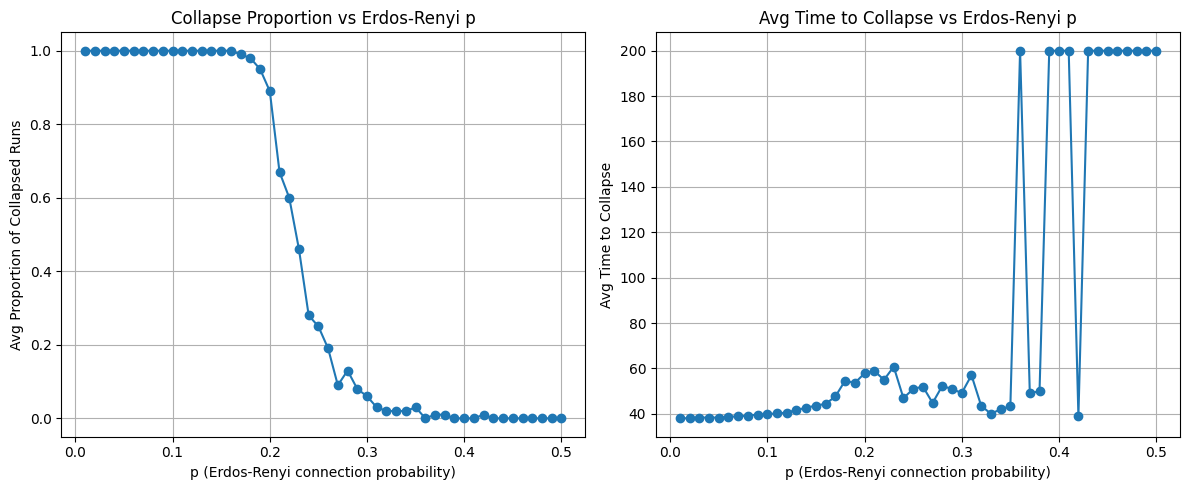

In [36]:
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the proportion of collapsed societies
ax1.plot(p_values, collapse_proportions, marker='o')
ax1.set_xlabel('p (Erdos-Renyi connection probability)')
ax1.set_ylabel('Avg Proportion of Collapsed Runs')
ax1.set_title('Collapse Proportion vs Erdos-Renyi p')
ax1.grid(True)

# Plot the average collapse time
ax2.plot(p_values, avg_collapse_times, marker='o')
ax2.set_xlabel('p (Erdos-Renyi connection probability)')
ax2.set_ylabel('Avg Time to Collapse')
ax2.set_title('Avg Time to Collapse vs Erdos-Renyi p')
ax2.grid(True)

# Show the plots
plt.tight_layout()

file_name="collapse_proportion_vs_p_erdosrenyi.png"

# Replace any special characters or spaces with underscores to ensure compatibility

# Define the full path where the file will be saved
PATH_TO_SAVE = "../Output/Images/Estructural Parameters/"

# Save the figure using the structured file name
plt.savefig('/Users/catalinabernal/Desktop/TragedyCommons/Tragedy_commons/Figures/resumen.png')

# Show the figure

plt.show()